# Sentiment analysis using HuggingFace transformers and cuda GPU
## Pre-trained model used: https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english
## Sentiment analysis performed on top 20 play store app https://www.kaggle.com/datasets/odins0n/top-20-play-store-app-reviews-daily-update?select=Dropbox.csv

In [1]:
# Load libraries
import os
import pandas as pd
import torch
import matplotlib.pyplot as plt
from transformers import pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [2]:
torch.cuda.is_available()

True

In [3]:
# Initialize tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, device = 0)

/home/el/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
# Directory containing CSV files
directory = '/home/el/Documents/workspace/sentiment_analysis'

# Dictionary to store sentiment counts for each file
sentiment_summary = {}

In [5]:
# Loop through each CSV file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        print(f'Processing {filename}...')
        
        try:
            # Load CSV file
            df = pd.read_csv(filepath)
            df = df.dropna(subset=['content'])
            df['content'] = df['content'].astype(str)
            
            # Run sentiment analysis
            texts = df['content'].values.tolist()
            results = nlp(texts)
            
            # Count positive and negative sentiments
            sentiments = [result['label'] for result in results]
            sentiment_counts = pd.Series(sentiments).value_counts()
            
            # Store sentiment summary for this file
            sentiment_summary[filename] = {
                'positive': sentiment_counts.get('POSITIVE', 0),
                'negative': sentiment_counts.get('NEGATIVE', 0)
            }

        except FileNotFoundError:
            # Handle the case where the file is missing
            print(f"Error: {filename} not found.")

        except Exception as e:
            # Handle any other errors (e.g., data loading/processing issues)
            print(f"Error processing {filename}: {str(e)}")


Processing Facebook Lite.csv...
Processing Snapchat.csv...
Processing Viber.csv...
Processing Dropbox.csv...
Processing Flipboard.csv...
Processing Subway Surfers.csv...
Processing Microsoft Word.csv...
Processing Microsoft PowerPoint.csv...
Processing WhatsApp.csv...
Processing Twitter.csv...


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Processing TikTok.csv...
Processing Instagram.csv...
Processing Candy Crush Saga.csv...
Processing Spotify.csv...
Processing LINE.csv...
Processing Netflix.csv...
Processing SHAREit.csv...
Processing Facebook Messenger.csv...
Processing Skype.csv...
Processing Facebook.csv...


In [9]:
# Convert the sentiment summary dictionary to a DataFrame for plotting
summary_df = pd.DataFrame.from_dict(sentiment_summary, orient='index')
summary_df.to_csv('sentiment_summary.csv', index=True)

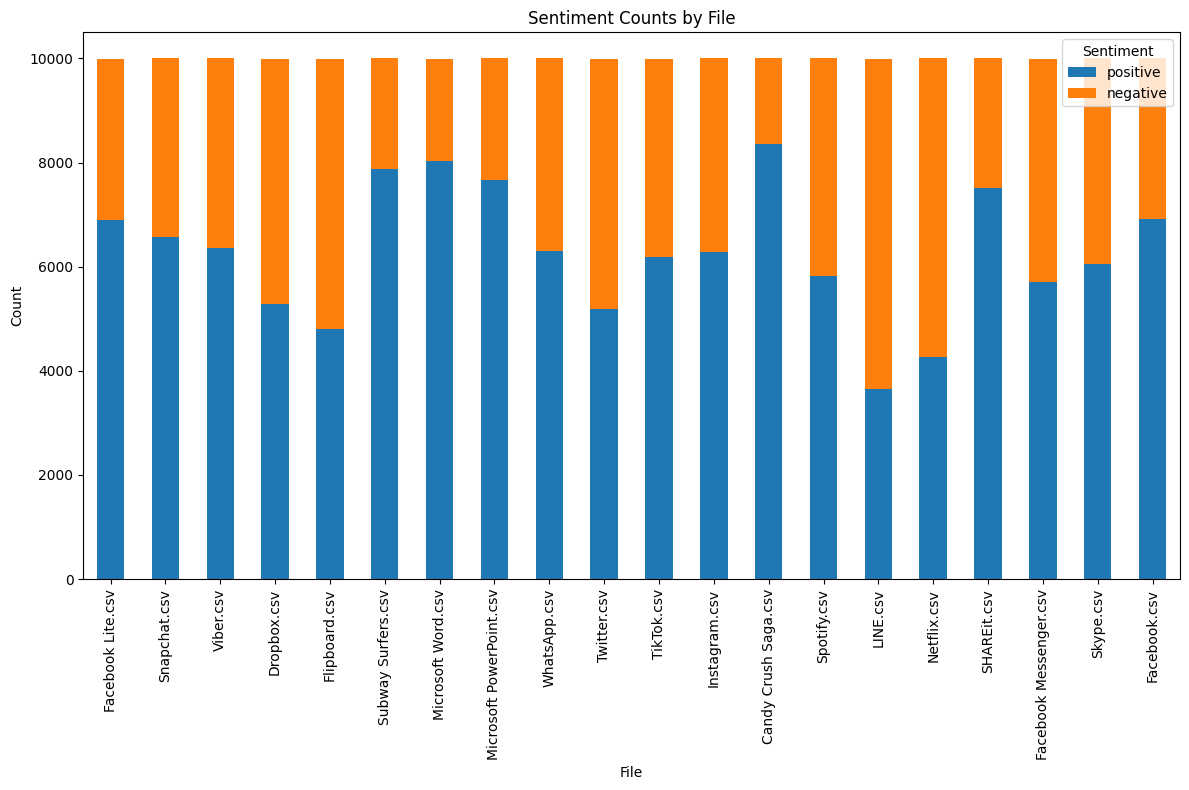

In [8]:
# Plot the sentiment counts as a barplot
summary_df.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Counts by File')
plt.xlabel('File')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()